In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import math

# Q1 Discrete Fourier Transform

Function definition of DFT

In [2]:
def dft(x,N):
    X = np.zeros(N,dtype='complex')
    for k in range(N):
        for n in range(N):
            X[k] += x[n]*np.exp((-1j*2*np.pi/N)*k*n)
    return X
    

Function definition of IDFT

In [3]:
def idft(X,N):
    x = np.zeros(N,dtype='complex')
    for n in range(N):
        for k in range(N):
            x[n] += X[k]*np.exp((1j*2*np.pi/N)*k*n)
    x = x/N
    return x
    

Function definition of Circular convolution

In [4]:
def circ_conv(x,h):
    N = max(len(x),len(h))
    y = np.zeros(N)
    for i in range(len(x)):
        for j in range(len(h)):
            t = (i+j)%N
            y[t] += x[i]*h[j]
    return y   
            

Function definition of Modified DFT to obtain DTFS coefficients

In [5]:
def dft_modified(x,N):
    X = np.zeros(N,dtype='complex')
    for k in range(N):
        for n in range(N):
            X[k] += x[n]*np.exp((-1j*2*np.pi/N)*k*n)
    X = X.tolist()
    for i in range(3):
        X.extend(X)
    X = np.array(X)
    
    return X

Write a function to compute the circular convolution of two sequences.
Find the circular convolution of x = [1; 2; 3; 0; 0; 0; 0] and h = [1; 1; 1; 1; 1; 1; 1]
using the function.

In [6]:
x1 = np.array([1,2,3,0,0,0,0])
h1 = np.array([1,1,1,1,1,1,1])
y1 = circ_conv(x1,h1)
print('Circular convolution of x[n] and h[n] is:',y1)


Circular convolution of x[n] and h[n] is: [6. 6. 6. 6. 6. 6. 6.]


A signal is given as x(t) = cos2pift where f = 30 Hz. The signal is sampled
at 100 times per second for 10 seconds and then its DFT is computed. Plot
the spectrum versus frequency in Hz. What is the magnitude of DFT at
35 Hz? Is this value non-zero? If so then why?

The magnitude of DFT at f=35Hz is 2.05 .The magnitude is not zero as DFT suffers from spectral leakage at OFF-DFT frequency. OFF-DFT frequency is the frequency where f!=k/N (where k and N are integers). Here, 35Hz is the OFF-DFT frequency of DFT frequency sequence 


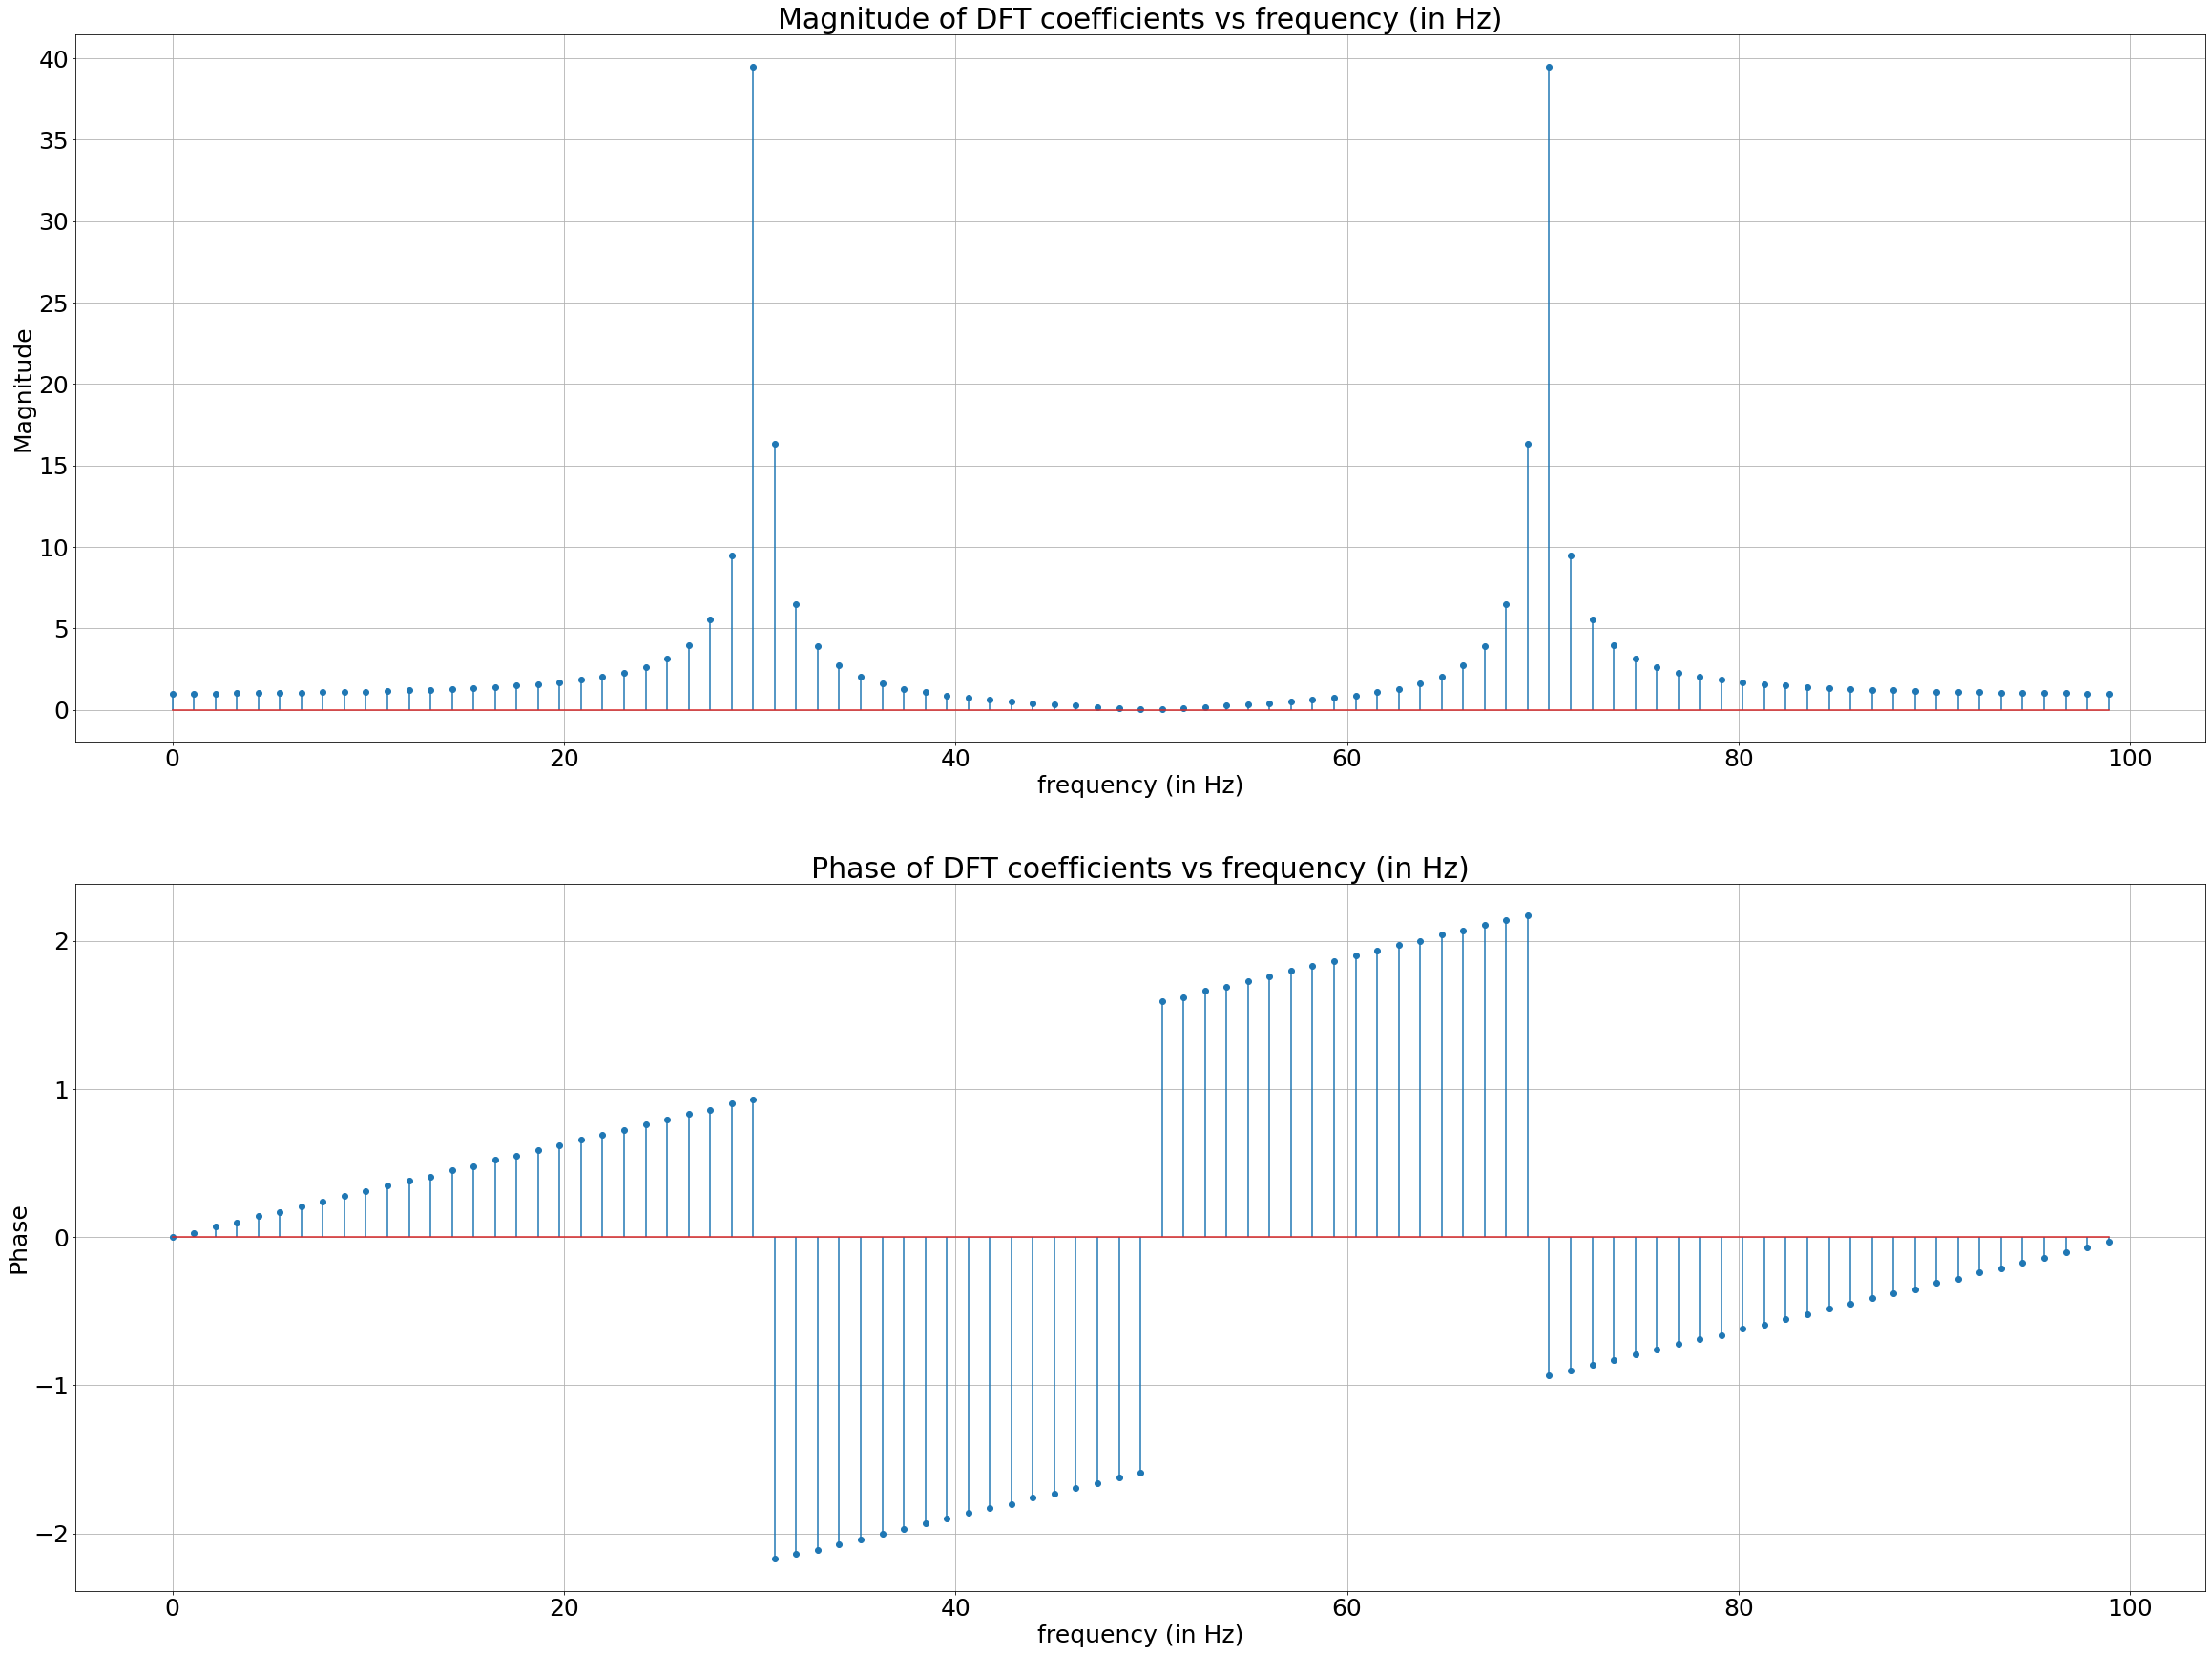

In [7]:
f1 = 30 # Frequency of sine wave signal
fs1 = 100 # Sampling frequency
T1 = 0.91 # in seconds
N1 = int(fs1*T1) # No. of samples of DFT
t1 = np.arange(0,T1,1/fs1)
x1 = np.cos(2*np.pi*f1*t1)
n1 = np.arange(N1)
X1_dft = dft(x1,N1)
f_n = (n1*fs1)/N1 # since f=k/NTs

# For plotting the spectrum
titles = ['Magnitude of DFT coefficients vs frequency (in Hz)','Phase of DFT coefficients vs frequency (in Hz)']
ylabels = ['Magnitude','Phase']
yvalues = [np.round(np.abs(X1_dft),2),np.round(np.angle(X1_dft),2)]

matplotlib.rcParams.update({'font.size': 25})
fig,ax = plt.subplots(2,1,figsize=(40, 30))
for i in range(2):
    ax[i].stem(f_n,yvalues[i],use_line_collection=True)
    ax[i].set_title(titles[i])
    ax[i].set_xlabel('frequency (in Hz)')
    ax[i].set_ylabel(ylabels[i])
    ax[i].grid()

mag_35 = np.round(np.abs(X1_dft)[np.round(f_n)==35][0],2)
print('The magnitude of DFT at f=35Hz is',mag_35,'.The magnitude is not zero as DFT suffers from spectral leakage at OFF-DFT frequency. OFF-DFT frequency is the frequency where f!=k/N (where k and N are integers). Here, 35Hz is the OFF-DFT frequency of DFT frequency sequence ')

Consider the two sequences y = [1;-3; 1; 5] and x = [7;-7;-9;-3]. Does
there exist a sequence h such that y is the circular convolution of x and
h. Find h using DFT and IDFT.

In [8]:
y1 = np.array([1,-3,1,5])
x1 = np.array([7,-7,-9,-3])
X1_dft = np.around(dft(x1,len(x1)),2)
Y1_dft = np.around(dft(y1,len(y1)),2)
H1_dft = Y1_dft/X1_dft
h1 = np.real(idft(H1_dft,len(H1_dft)))
print('Impulse response of the system characterised by x[n] and y[n] is', np.round(h1,2))

Impulse response of the system characterised by x[n] and y[n] is [-0.02 -0.32 -0.14  0.15]


Compute the energy of the signal x[n] = (3/4)^n*u[n] for 0<=n<=50. If the
DFT of this signal is X(k) then what is the energy of X(k) and how does
it relate to that of x[n].

In [9]:
N1 = 51
n1 = np.arange(51)
x1 = np.power(0.75,n1)
energy_t = np.sum(np.power(abs(x1),2))
print('Energy of the signal, x[n] is',round(energy_t,2),'J')
X1_dft = dft(x1,N1)
energy_f = (1/N1)*(np.sum(np.square(abs(X1_dft))))
print('Energy of signal x[n] (in time domain) = (1/N)*Energy of X[k] (in frequency domain)')
print('Energy of the signal, X[k] (in frequency domain) is',round(energy_f,2),'J')


Energy of the signal, x[n] is 2.29 J
Energy of signal x[n] (in time domain) = (1/N)*Energy of X[k] (in frequency domain)
Energy of the signal, X[k] (in frequency domain) is 2.29 J


Is it possible to compute the DTFS coecients of the square wave men-
tioned in Assignment-3 using the function written for DFT as mentioned
above. If yes, then modify the function to compute the DTFS coefficients
of the signal and show a labelled plot of the spectrum of these coefficients.

DFT function can be modified (as shown above) to calculate the DTFS coefficients of the periodic square wave

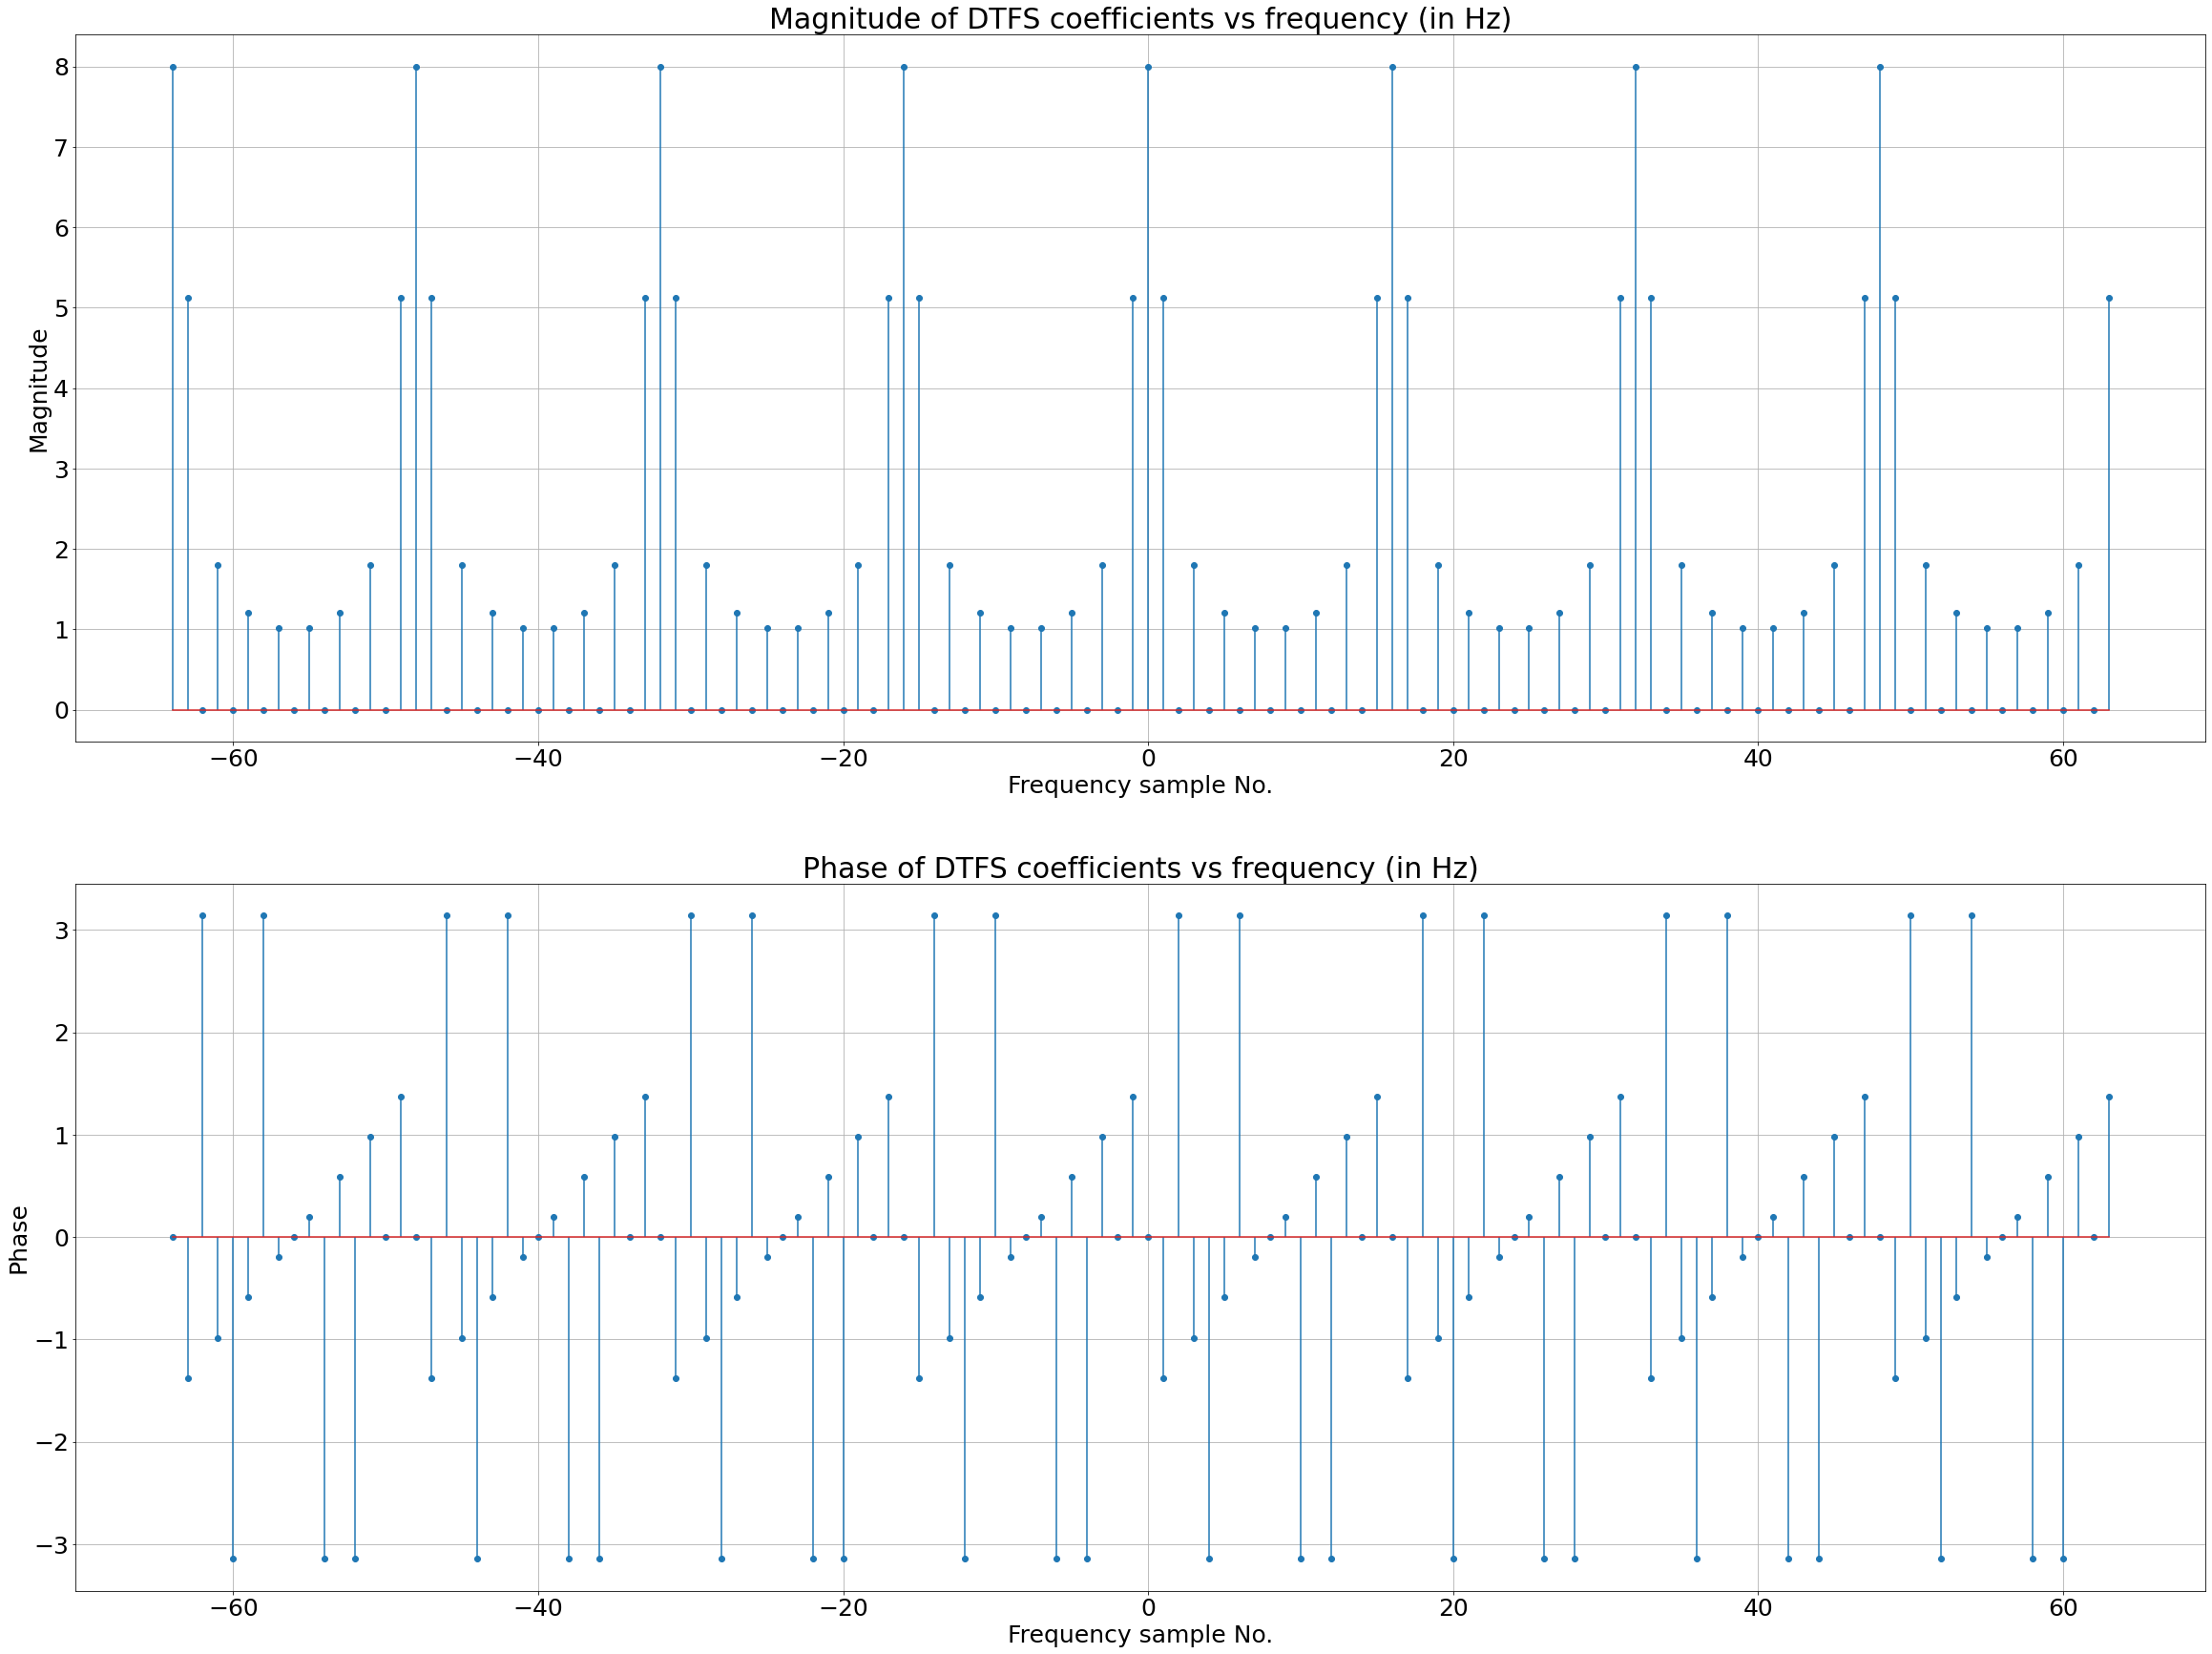

In [10]:
N1 = 16
x1 = np.zeros(N1)
n1 = np.arange(N1)
x1[(n1>=0) & (n1<N1/2)] = 1
X1 = np.around(dft_modified(x1,N1),2)
f_n = np.arange(-4*N1,4*N1)

# For plotting the spectrum
titles = ['Magnitude of DTFS coefficients vs frequency (in Hz)','Phase of DTFS coefficients vs frequency (in Hz)']
ylabels = ['Magnitude','Phase']
yvalues = [np.abs(X1),np.angle(X1)]

matplotlib.rcParams.update({'font.size': 25})
fig,ax = plt.subplots(2,1,figsize=(40, 30))
for i in range(2):
    ax[i].stem(f_n,yvalues[i],use_line_collection=True)
    ax[i].set_title(titles[i])
    ax[i].set_xlabel('Frequency sample No.')
    ax[i].set_ylabel(ylabels[i])
    ax[i].grid()

# Q2 Discrete Cosine Transform

Function definition of DCT

In [11]:
def dct(x,N):
    X = np.zeros(N)
    for m in range(N):
        for n in range(N):
            if m==0:
                c_m = 1/np.sqrt(2)
            else:
                c_m = 1
            X[m] += x[n]*c_m*np.cos(((np.pi*m)/(2*N))*(2*n+1))
    X = X*np.sqrt(2/N)
    return X
            

Function definition of IDCT

In [12]:
def idct(X,N):
    x = np.zeros(N)
    for n in range(N):
        for m in range(N):
            if m==0:
                c_m = 1/np.sqrt(2)
            else:
                c_m = 1
            x[n] += X[m]*c_m*np.cos(((np.pi*m)/(2*N))*(2*n+1))
    x = x*np.sqrt(2/N)
    return x

Consider a signal x[n] = [8; 16; 24; 32; 40; 48; 56; 64] of length N = 8. Com-
pute the DCT of this signal. Now keep only the first four DCT coefficients
while discarding the rest and then compare its energy with that of x[n].
Compute the inverse DCT of the sequence obtained and plot it alongside
x[n]. Also compute the mean square error between the two signals.

Computation of DCT of x[n], DCT compression and reconstruction of x[n]

In [13]:
x1 = np.array([8,16,24,32,40,48,56,64])
N1 = len(x1)
n1 = np.arange(N1)
X1_dct = dct(x1,N1)
X1_comp_dct = np.zeros(8)
X1_comp_dct[0:4] = X1_dct[0:4]
energy_orig = np.sum(np.square(x1))
energy_comp_dct = np.sum(np.square(X1_comp_dct))
print('Energy of x[n] is',energy_orig, 'J')
print('Energy of compressed DCT of x[n] is',energy_comp_dct,'J')
print('Energy of x[n] and compressed DCT of x[n] are very close to each other. This means DCT can be used for compression as the energy of the signal is almost preserved after compression')
x1_recon_dct = idct(X1_comp_dct,N1)

Energy of x[n] is 13056 J
Energy of compressed DCT of x[n] is 13053.252307055178 J
Energy of x[n] and compressed DCT of x[n] are very close to each other. This means DCT can be used for compression as the energy of the signal is almost preserved after compression


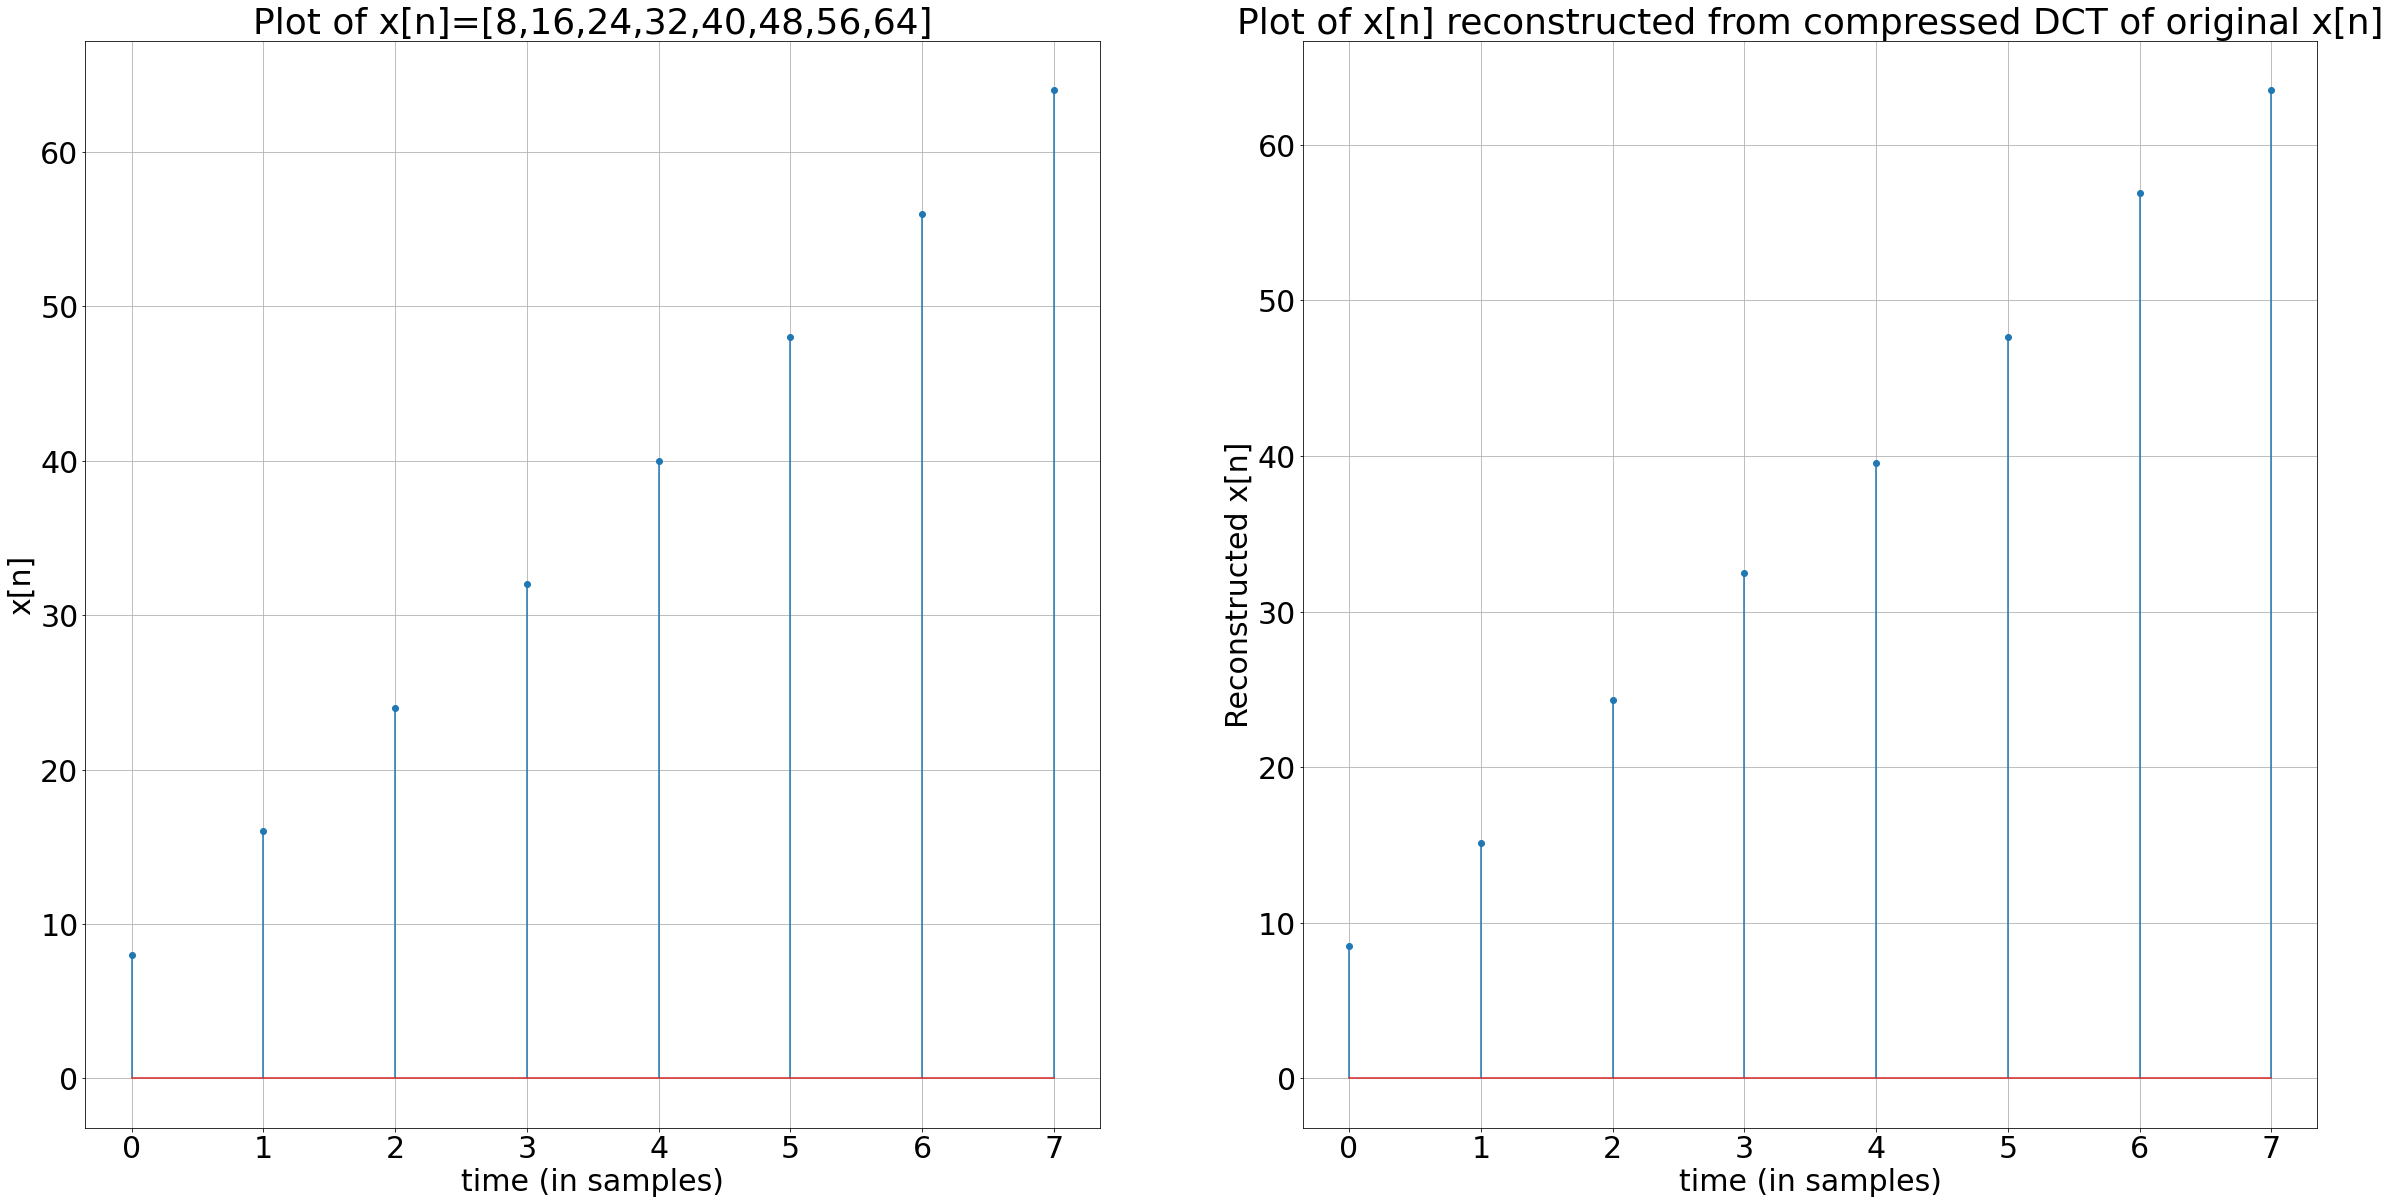

In [14]:
# For plotting the original x[n] and x[n] reconstructed from its compressed DCT
titles = ['Plot of x[n]=[8,16,24,32,40,48,56,64]','Plot of x[n] reconstructed from compressed DCT of original x[n]']
ylabels = ['x[n]','Reconstructed x[n]']
yvalues = [x1,x1_recon_dct]


matplotlib.rcParams.update({'font.size': 30})
fig,ax = plt.subplots(1,2,figsize=(40, 20))
for i in range(2):
    ax[i].stem(n1,yvalues[i],use_line_collection=True)
    ax[i].set_title(titles[i])
    ax[i].set_xlabel('time (in samples)')
    ax[i].set_ylabel(ylabels[i])
    ax[i].grid()

Mean square error computation of x[n] and x[n] reconstructed from compressed DCT

In [15]:
MSE_dct = np.round(np.sum(np.square(x1-x1_recon_dct)),2)
print('The mean square error between samples of x[n] and x[n] reconstructed from compressed DCT is',MSE_dct)

The mean square error between samples of x[n] and x[n] reconstructed from compressed DCT is 2.75


Computation of DFT of x[n], DFT compression and reconstruction of x[n]

In [16]:
X1_dft = dft(x1,N1)
X1_comp_dft = np.zeros(8,dtype='complex')
X1_comp_dft[0:4] = X1_dft[0:4]
energy_orig = np.sum(np.square(np.abs(x1)))
energy_comp_dft = np.sum(np.square(np.abs(X1_comp_dft)))/N1
print('Energy of x[n] is',energy_orig, 'J')
print('Energy of compressed DFT of x[n] is',energy_comp_dft,'J')
print('Energy of x[n] and compressed DFT of x[n] are very much different from each other. This means DFT cannot be used for compression as the energy of the signal cannot be preserved after compression')
x1_recon_dft = idft(X1_comp_dft,N1)

Energy of x[n] is 13056 J
Energy of compressed DFT of x[n] is 11648.0 J
Energy of x[n] and compressed DFT of x[n] are very much different from each other. This means DFT cannot be used for compression as the energy of the signal cannot be preserved after compression


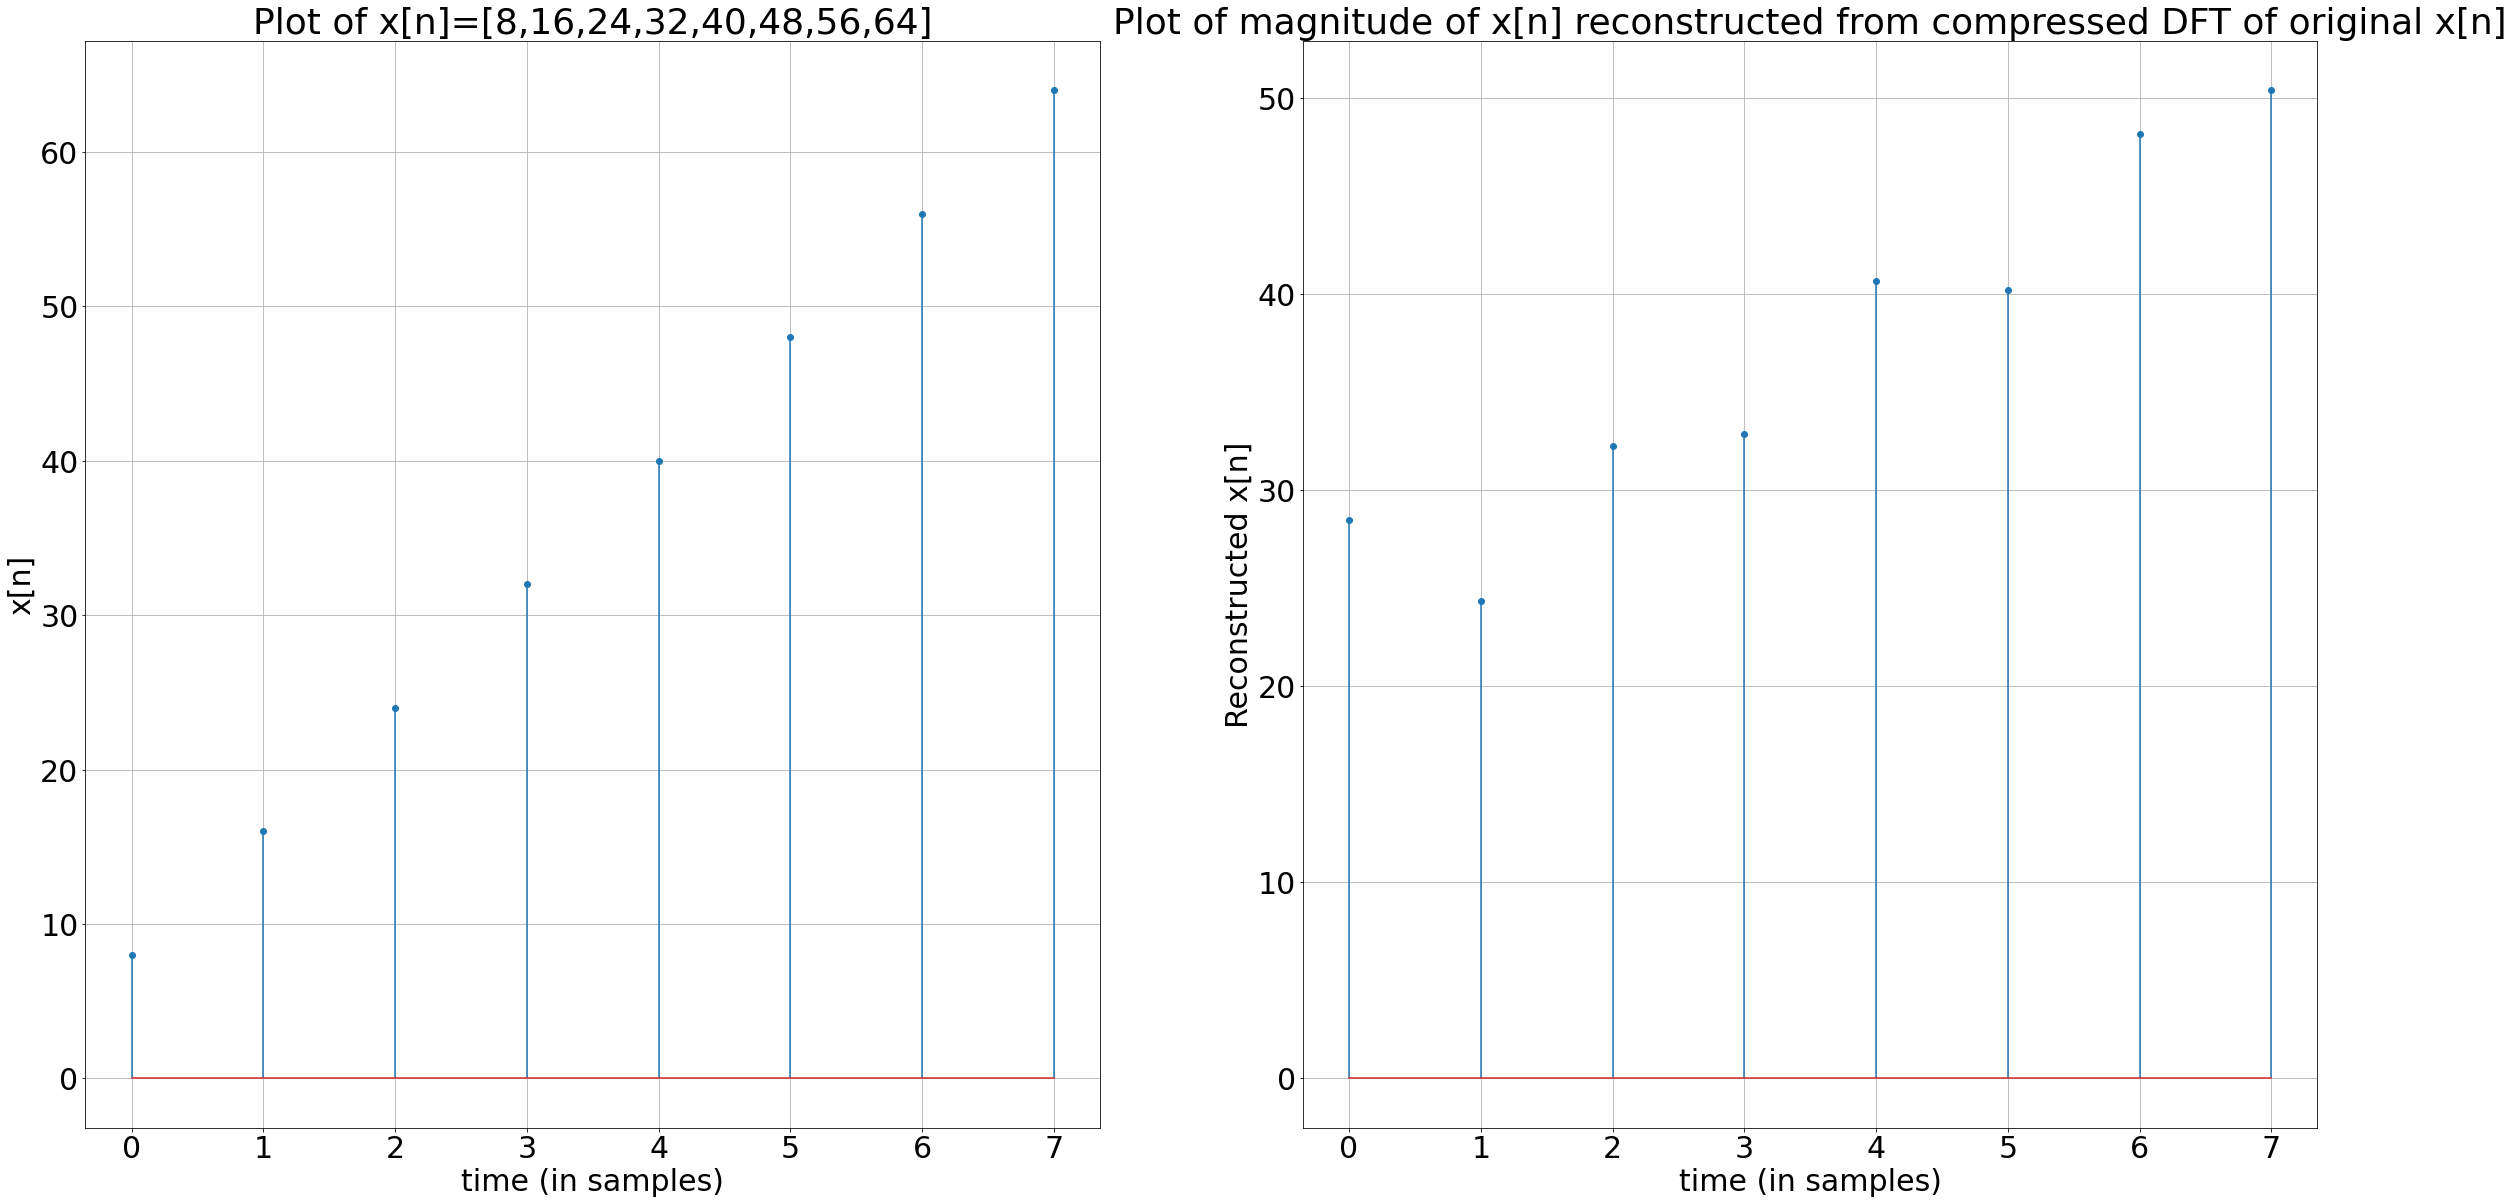

In [17]:
# For plotting the original x[n] and x[n] reconstructed from its compressed DFT
titles = ['Plot of x[n]=[8,16,24,32,40,48,56,64]','Plot of magnitude of x[n] reconstructed from compressed DFT of original x[n]']
ylabels = ['x[n]','Reconstructed x[n]']
yvalues = [x1,np.abs(x1_recon_dft)]


matplotlib.rcParams.update({'font.size': 30})
fig,ax = plt.subplots(1,2,figsize=(40, 20))
for i in range(2):
    ax[i].stem(n1,yvalues[i],use_line_collection=True)
    ax[i].set_title(titles[i])
    ax[i].set_xlabel('time (in samples)')
    ax[i].set_ylabel(ylabels[i])
    ax[i].grid()

Mean square error computation of x[n] and x[n] reconstructed from compressed DFT

In [18]:
MSE_dft = np.round(np.sum(np.square(x1-np.abs(x1_recon_dft))),2)
print('The mean square error between samples of x[n] and x[n] reconstructed from compressed DFT is',MSE_dft)

The mean square error between samples of x[n] and x[n] reconstructed from compressed DFT is 865.19


Observations:


1. x[n] reconstructed from its compressed DCT is almost close to that of original x[n] whereas x[n] reconstructed from its compressed DFT is very much different from that of original x[n]. This means DCT preserves most of the energy in the initial frequency samples even after compression.
2. The Mean Square Error (MSE) between original x[n] and x[n] reconstructed from its compressed DCT is very small whereas the MSE between original x[n] and x[n] reconstructed from its compressed DFT is very high. This means x[n] can be reconstructed from its compressed DCT without much distortion

Hence DCT is mostly used for signal compression applications (especially in jpeg image compressions).